In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv('diamonds.csv')

In [50]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [51]:
df = df.drop('Unnamed: 0', axis=1)

In [52]:

cut_map = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}

df['cut'] = df['cut'].map(cut_map)

In [53]:

color_map = {
    'D': 0,
    'E': 1,
    'F': 2,
    'G': 3,
    'H': 4,
    'I': 5,
    'J': 6
}

df['color'] = df['color'].map(color_map)

In [54]:

clarity_map = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

df['clarity'] = df['clarity'].map(clarity_map)

In [55]:
scaler = StandardScaler()
df = df.copy()
df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']] = scaler.fit_transform(df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])

In [56]:
# Features
X = df.drop('price', axis=1)

# Target
y = df['price']

In [57]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.198168,4,1,1,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,3,1,2,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,1,1,4,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,3,5,3,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,1,6,1,1.082358,0.242928,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...,...,...
53935,-0.164427,4,0,2,-0.662711,-0.204605,0.016798,0.022304,-0.054888
53936,-0.164427,1,0,2,0.942753,-1.099672,-0.036690,0.013548,0.100988
53937,-0.206621,2,0,2,0.733344,1.137995,-0.063434,-0.047741,0.030135
53938,0.130927,3,4,1,-0.523105,0.242928,0.373383,0.337506,0.285204


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25,
                                                    random_state = 0,
                                                    shuffle = True)

### Linear Regression Model

In [59]:
modelLir = LinearRegression()
modelLir.fit(X_train, y_train)

LinearRegression()

In [60]:
y_predLir = modelLir.predict(X_test)

In [128]:
print(f"R2: {r2_score(y_test, y_predLir):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_predLir):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_predLir):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_predLir)):.4f}")

R2: 0.9083
MSE: 0.0921
MAE: 0.2021
RMSE: 0.3034


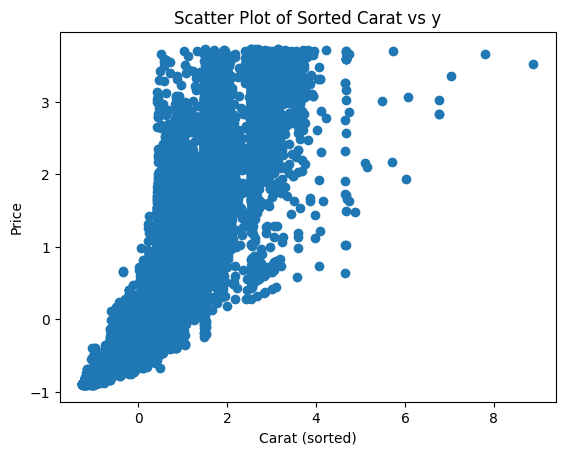

In [62]:
# Sort the 'carat' column and get matching y values
sorted_indices = X['carat'].argsort()
carat_sorted = X['carat'].values[sorted_indices]
y_sorted = y[sorted_indices]  # assuming y is a NumPy array or Series aligned with X

# Scatter plot
plt.scatter(carat_sorted, y_sorted)
plt.xlabel('Carat (sorted)')
plt.ylabel('Price')
plt.title('Scatter Plot of Sorted Carat vs y')
plt.show()

### KNN Regressor

In [67]:
scores = []
nums = range(1,26)
best_knn = []
best_score_i = -1000

for i in nums:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_i = knn.score(X_test, y_test)
    scores.append(score_i)
    
    if score_i > best_score_i:
        best_score_i = score_i
        best_knn = i

print(best_knn)

6


In [72]:
best_knn = KNeighborsRegressor(n_neighbors=6)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

In [130]:
print(f'R2: {best_knn.score(X_test, y_test):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_best):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_best):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.4f}')

R2: 0.9676
MSE: 0.0325
MAE: 0.0953
RMSE: 0.1802


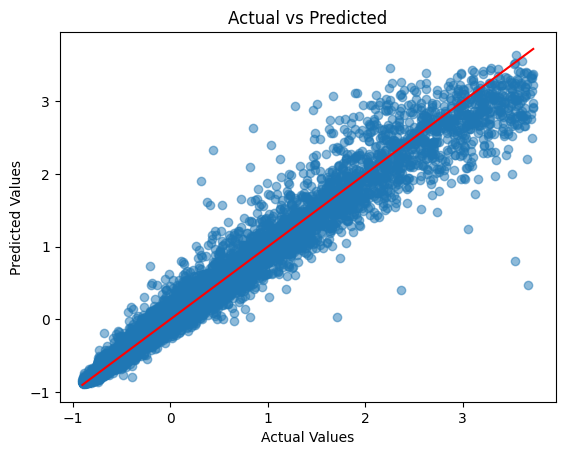

In [76]:
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.show()

### SVR Model 

In [77]:
modelRBF = SVR(kernel='rbf', 
               gamma='auto',
               tol = 0.001,
               C = 1.5,
               max_iter = 100000,).fit(X_train, y_train)

In [78]:
scoreSVRrbf = modelRBF.score(X_test, y_test)
y_predRBF = modelRBF.predict(X_test)

In [131]:
print(f'R2: {modelRBF.score(X_test, y_test):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_predRBF):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_predRBF):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predRBF)):.4f}')

R2: 0.9776
MSE: 0.0225
MAE: 0.0831
RMSE: 0.1499


In [135]:
modelnr = SVR(kernel='linear', 
               gamma='auto',
               tol = 0.001,
               C = 1.5,
               max_iter = 100000,).fit(X_train, y_train)

In [136]:
scoreSVRlnr = modelnr.score(X_test, y_test)
y_predlnr = modelnr.predict(X_test)

In [137]:
print(f'R2: {modelnr.score(X_test, y_test):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_predlnr):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_predlnr):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predlnr)):.4f}')

R2: 0.8612
MSE: 0.1393
MAE: 0.2700
RMSE: 0.3732


### Decision Tree Regressor

In [96]:
modelTR = DecisionTreeRegressor().fit(X_train, y_train)
y_predTR = modelTR.predict(X_test) 
scoreTR = modelTR.score(X_test, y_test)

In [138]:
print(f"R² Score: { modelTR.score(X_test, y_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_predTR):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_predTR):.4F}")
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predTR)):.4f}')

R² Score: 0.9657
MSE: 0.0345
MAE: 0.0888
RMSE: 0.1856


### Random Forest Regressor

In [99]:
score=[]
estimator_num=[]
temp_score = []

for estimators in range(1,301,25):
    
    estimator_num.append(estimators)
    modelRFR = RandomForestRegressor(n_estimators = estimators, 
                                         random_state = 0).fit(X_train,
                                                               y_train)
    y_predRFR = modelRFR.predict(X_test)
    
    score = (modelRFR.score(X_test, y_test))
    temp_score.append(score)

    #print(estimators,'estimators gives a score of:',modelRFR.score(X_test, y_test))

scoreRFR = max(temp_score)
print('Random Forest Maximum Score is:',scoreRFR)

Random Forest Maximum Score is: 0.980571090261661


In [139]:
print(f"R²: {modelRFR.score(X_test, y_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_predRFR):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_predRFR):.4F}")
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predRFR)):.4f}')

R²: 0.9806
MSE: 0.0195
MAE: 0.0671
RMSE: 0.1396


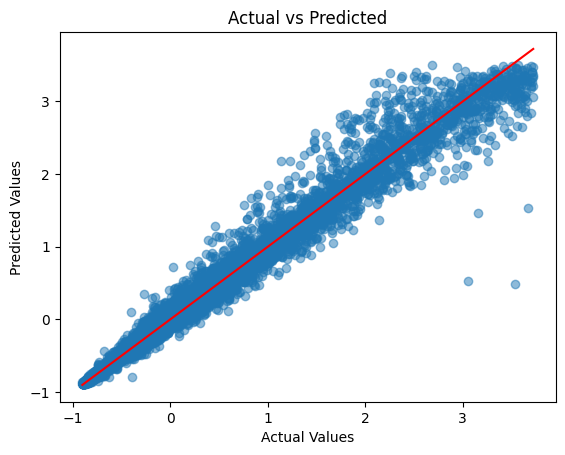

In [141]:
plt.scatter(y_test, y_predRFR, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.show()

### ANN for Regression

In [115]:
modelANNKerasR = Sequential()

# Input + first hidden layer
modelANNKerasR.add(Dense(units=16, activation='relu', input_shape=(9,), kernel_initializer='uniform'))
modelANNKerasR.add(Dropout(0.05))

# Second hidden layer
modelANNKerasR.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
modelANNKerasR.add(Dropout(0.05))

# Output layer for regression (1 value)
modelANNKerasR.add(Dense(units=1, activation='linear', kernel_initializer='uniform'))

# Compile the model
modelANNKerasR.compile(optimizer='adam',
                      loss='mean_squared_error',
                      metrics=['mae'])
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, verbose=1)

# Save the best model (monitor val_loss for regression)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
modelANNKerasR.fit(X_train, y_train,
                  batch_size=32,
                  epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[early_stop, checkpoint],
                  verbose=1)

Epoch 1/100
1255/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3115 - mae: 0.3297

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3100 - mae: 0.3287 - val_loss: 0.0452 - val_mae: 0.1217
Epoch 2/100
1241/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0682 - mae: 0.1547

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0681 - mae: 0.1546 - val_loss: 0.0405 - val_mae: 0.1156
Epoch 3/100
1264/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0564 - mae: 0.1412

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0564 - mae: 0.1412 - val_loss: 0.0353 - val_mae: 0.0978
Epoch 4/100
1247/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0521 - mae: 0.1358

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0521 - mae: 0.1357 - val_loss: 0.0340 - val_mae: 0.0978
Epoch 5/100
1248/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0493 - mae: 0.1317

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0492 - mae: 0.1317 - val_loss: 0.0328 - val_mae: 0.0937
Epoch 6/100
1248/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0474 - mae: 0.1310

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0474 - mae: 0.1310 - val_loss: 0.0325 - val_mae: 0.1003
Epoch 7/100
1260/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0464 - mae: 0.1295

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0464 - mae: 0.1295 - val_loss: 0.0308 - val_mae: 0.0918
Epoch 8/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0451 - mae: 0.1270 - val_loss: 0.0309 - val_mae: 0.0920
Epoch 9/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0476 - mae: 0.1291 - val_loss: 0.0314 - val_mae: 0.0924
Epoch 10/100
1252/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0447 - mae: 0.1255

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0447 - mae: 0.1255 - val_loss: 0.0307 - val_mae: 0.0922
Epoch 11/100
1256/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0432 - mae: 0.1236

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0432 - mae: 0.1236 - val_loss: 0.0304 - val_mae: 0.0944
Epoch 12/100
1243/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0430 - mae: 0.1234

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0430 - mae: 0.1233 - val_loss: 0.0289 - val_mae: 0.0928
Epoch 13/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0414 - mae: 0.1207

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0414 - mae: 0.1207 - val_loss: 0.0282 - val_mae: 0.0933
Epoch 14/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0396 - mae: 0.1196 - val_loss: 0.0282 - val_mae: 0.0918
Epoch 15/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0390 - mae: 0.1190 - val_loss: 0.0323 - val_mae: 0.0975
Epoch 16/100
1230/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0371 - mae: 0.1169

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0371 - mae: 0.1169 - val_loss: 0.0277 - val_mae: 0.0913
Epoch 17/100
1257/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0386 - mae: 0.1185

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0386 - mae: 0.1185 - val_loss: 0.0254 - val_mae: 0.0862
Epoch 18/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0368 - mae: 0.1165 - val_loss: 0.0304 - val_mae: 0.0953
Epoch 19/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0373 - mae: 0.1177

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0373 - mae: 0.1177 - val_loss: 0.0252 - val_mae: 0.0884
Epoch 20/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0375 - mae: 0.1166 - val_loss: 0.0309 - val_mae: 0.1012
Epoch 21/100
1261/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356 - mae: 0.1152

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0356 - mae: 0.1152 - val_loss: 0.0246 - val_mae: 0.0854
Epoch 22/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0391 - mae: 0.1179 - val_loss: 0.0252 - val_mae: 0.0837
Epoch 23/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0377 - mae: 0.1171 - val_loss: 0.0251 - val_mae: 0.0915
Epoch 24/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0379 - mae: 0.1164 - val_loss: 0.0255 - val_mae: 0.0860
Epoch 25/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0366 - mae: 0.1147 - val_loss: 0.0316 - val_mae: 0.0920
Epoch 26/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0364 - mae: 0.1145 - val_loss: 0.0247 - val_mae: 0.0828
Epoch 27/100
1262/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0382 - mae: 0.1166

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0382 - mae: 0.1166 - val_loss: 0.0245 - val_mae: 0.0847
Epoch 28/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0356 - mae: 0.1139 - val_loss: 0.0255 - val_mae: 0.0937
Epoch 29/100
1254/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0360 - mae: 0.1137

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0360 - mae: 0.1137 - val_loss: 0.0236 - val_mae: 0.0838
Epoch 30/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0352 - mae: 0.1120 - val_loss: 0.0247 - val_mae: 0.0856
Epoch 31/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0359 - mae: 0.1137 - val_loss: 0.0241 - val_mae: 0.0897
Epoch 32/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0365 - mae: 0.1136 - val_loss: 0.0247 - val_mae: 0.0873
Epoch 33/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0357 - mae: 0.1140 - val_loss: 0.0282 - val_mae: 0.0933
Epoch 34/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0339 - mae: 0.1129 - val_loss: 0.0243 - val_mae: 0.0863
Epoch 35/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0346 - mae: 0.1117 - val_loss: 0.0263 - val_mae: 0.0888
Epoch 36/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0351 - mae: 0.1129 - val_loss: 0.0260 - val_mae: 0.0964
Epoch 37/100
1265/1265 ━━━━━━━━━━━━━━

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0343 - mae: 0.1120 - val_loss: 0.0233 - val_mae: 0.0843
Epoch 40/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0400 - mae: 0.1132 - val_loss: 0.0247 - val_mae: 0.0911
Epoch 41/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0353 - mae: 0.1133 - val_loss: 0.0251 - val_mae: 0.0909
Epoch 42/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0355 - mae: 0.1132 - val_loss: 0.0254 - val_mae: 0.0996
Epoch 43/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0352 - mae: 0.1126 - val_loss: 0.0238 - val_mae: 0.0865
Epoch 44/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0333 - mae: 0.1100 - val_loss: 0.0248 - val_mae: 0.0925
Epoch 45/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0342 - mae: 0.1116 - val_loss: 0.0260 - val_mae: 0.0993
Epoch 46/100
1263/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0349 - mae: 0.1123

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0349 - mae: 0.1123 - val_loss: 0.0229 - val_mae: 0.0822
Epoch 47/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0366 - mae: 0.1107 - val_loss: 0.0253 - val_mae: 0.0925
Epoch 48/100
1251/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347 - mae: 0.1129

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0347 - mae: 0.1129 - val_loss: 0.0228 - val_mae: 0.0814
Epoch 49/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0335 - mae: 0.1103 - val_loss: 0.0230 - val_mae: 0.0841
Epoch 50/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0337 - mae: 0.1113 - val_loss: 0.0239 - val_mae: 0.0911
Epoch 51/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0355 - mae: 0.1119 - val_loss: 0.0238 - val_mae: 0.0843
Epoch 52/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0346 - mae: 0.1115 - val_loss: 0.0238 - val_mae: 0.0901
Epoch 53/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0343 - mae: 0.1111 - val_loss: 0.0229 - val_mae: 0.0837
Epoch 54/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0392 - mae: 0.1131 - val_loss: 0.0243 - val_mae: 0.0863
Epoch 55/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0345 - mae: 0.1108 - val_loss: 0.0240 - val_mae: 0.0852
Epoch 56/100
1265/1265 ━━━━━━━━━━━━━━

In [116]:
modelANNKerasR.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,349 (5.27 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 900 (3.52 KB)

In [117]:
#Load the best model
best_model = load_model('best_model.h5')

In [118]:
# Recompile (if you want to evaluate or retrain it)
best_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [119]:
#make prediction - multi-class classification
y_predANNR = best_model.predict(X_test)

print("Predicted class labels:", y_predANNR[:5])

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class labels: [[0.18763849]
 [0.7293144 ]
 [0.35947725]
 [1.8638147 ]
 [0.08877996]]


In [120]:
#Evaluate model performance
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0237 - mae: 0.0819    
Test Accuracy: 0.0814


In [140]:
y_predANNR = modelANNKerasR.predict(X_test)
print(f'R²: {r2_score(y_test, y_predANNR):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_predANNR):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_predANNR):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_predANNR)):.4f}')

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R²: 0.9772
MAE: 0.0815
MSE: 0.0229
RMSE: 0.1513
